In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('Data/crime.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,06/18/2016,0:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1
1,06/18/2016,0:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1
2,06/18/2016,15,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1
3,06/18/2016,1:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1
4,06/18/2016,2:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        264496 non-null  object 
 1   CrimeTime        264496 non-null  object 
 2   CrimeCode        264496 non-null  object 
 3   Location         262692 non-null  object 
 4   Description      260445 non-null  object 
 5   Weapon           89833 non-null   object 
 6   Post             264286 non-null  float64
 7   District         264435 non-null  object 
 8   Neighborhood     262623 non-null  object 
 9   Location 1       262694 non-null  object 
 10  Total Incidents  264496 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 22.2+ MB


Seperating CrimeDate into day, month, and year

In [6]:
df['Date'] = pd.to_datetime(df['CrimeDate'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop(['CrimeDate'], axis=1) 
df.head()

,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Date,Year,Month,Day
0,0:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,2016-06-18,2016,6,18
1,0:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,2016-06-18,2016,6,18
2,15,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,2016-06-18,2016,6,18
3,1:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,2016-06-18,2016,6,18
4,2:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,2016-06-18,2016,6,18


Converting CrimeCode to actual crime names 

In [7]:
df['CrimeCode'] = df['CrimeCode'].replace(['1.*'],'HOMICIDE', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['2.*'],'SEXUAL ASSAULT', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['3.*'],'ROBBERY', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['4.*'],'AGG. ASSAULT', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['5.*'],'BURGLARY', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['6.*'],'LARCENY', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['7.*'],'AUTO THEFT', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['8.*'],'ARSON', regex=True)
df['CrimeCode'] = df['CrimeCode'].replace(['9.*'],'SHOOTING', regex=True)
df.head()

,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Date,Year,Month,Day
0,0:33:00,AGG. ASSAULT,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,2016-06-18,2016,6,18
1,0:39:00,AGG. ASSAULT,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,2016-06-18,2016,6,18
2,15,SHOOTING,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,2016-06-18,2016,6,18
3,1:53:00,ROBBERY,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,2016-06-18,2016,6,18
4,2:05:00,LARCENY,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,2016-06-18,2016,6,18


In [8]:
df['CrimeCode'].value_counts()

CrimeCode
LARCENY           94646
AGG. ASSAULT      73687
BURGLARY          41835
AUTO THEFT        24766
ROBBERY           22790
SHOOTING           2439
SEXUAL ASSAULT     1584
ARSON              1420
HOMICIDE           1329
Name: count, dtype: int64

Adding a new column (vio_prop) that will indicate if the crime is against humans --> violent or property --> property 

In [9]:
df['vio_prop'] = df['CrimeCode'].replace(['HOMICIDE', 'SEXUAL ASSAULT', 'ROBBERY', 'AGG. ASSAULT', 'SHOOTING'], 'Violent')
df['vio_prop'] = df['vio_prop'].replace(['BURGLARY', 'LARCENY', 'AUTO THEFT', 'ARSON'], 'Property')
df['vio_prop'] = df['vio_prop'].replace(['Other'], 'Other')
df.head()

,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Date,Year,Month,Day,vio_prop
0,0:33:00,AGG. ASSAULT,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,2016-06-18,2016,6,18,Violent
1,0:39:00,AGG. ASSAULT,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,2016-06-18,2016,6,18,Violent
2,15,SHOOTING,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,2016-06-18,2016,6,18,Violent
3,1:53:00,ROBBERY,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,2016-06-18,2016,6,18,Violent
4,2:05:00,LARCENY,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,2016-06-18,2016,6,18,Property


In [10]:
df['vio_prop'].value_counts()

vio_prop
Property    162667
Violent     101829
Name: count, dtype: int64

Checking null entries

In [11]:
df.isnull().sum()

CrimeTime               0
CrimeCode               0
Location             1804
Description          4051
Weapon             174663
Post                  210
District               61
Neighborhood         1873
Location 1           1802
Total Incidents         0
Date                    0
Year                    0
Month                   0
Day                     0
vio_prop                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeTime        264496 non-null  object        
 1   CrimeCode        264496 non-null  object        
 2   Location         262692 non-null  object        
 3   Description      260445 non-null  object        
 4   Weapon           89833 non-null   object        
 5   Post             264286 non-null  float64       
 6   District         264435 non-null  object        
 7   Neighborhood     262623 non-null  object        
 8   Location 1       262694 non-null  object        
 9   Total Incidents  264496 non-null  int64         
 10  Date             264496 non-null  datetime64[ns]
 11  Year             264496 non-null  int32         
 12  Month            264496 non-null  int32         
 13  Day              264496 non-null  int32         
 14  vio_prop         264

Since 174663/264496 (66%) of the entries of the Weapon column are null, and given the importance of knowing whether a weapon was used to commit a certain crime, we will create a new column, 'Weapon_Used' to indicate if a weapon was used or not insetaed of dropping said column.

In [13]:
weapons_list = ['HANDS', 'FIREARM', 'OTHER', 'KNIFE']

df['weapon_used'] = df['Weapon'].isin(weapons_list).map({True: 'True', False: 'False'})

df['weapon_used'].value_counts()

weapon_used
False    174663
True      89833
Name: count, dtype: int64

Fixing the description column

In [14]:
df['Description'].value_counts()

Description
I          132331
O          124346
Outside      3131
Inside        637
Name: count, dtype: int64

In [15]:
df['Description'] = df['Description'].replace({'I': 'Inside', 'O': 'Outside'})
df['Description'].value_counts()

Description
Inside     132968
Outside    127477
Name: count, dtype: int64

Adding a new column, 'day_of_week' to indicate the day on which the crimes occur 

In [16]:
df['day_of_week'] = df['Date'].dt.day_name()
df.head()

,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Date,Year,Month,Day,vio_prop,weapon_used,day_of_week
0,0:33:00,AGG. ASSAULT,2700 CHESLEY AVE,Inside,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,2016-06-18,2016,6,18,Violent,True,Saturday
1,0:39:00,AGG. ASSAULT,2700 FAIT AVE,Outside,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,2016-06-18,2016,6,18,Violent,True,Saturday
2,15,SHOOTING,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,2016-06-18,2016,6,18,Violent,True,Saturday
3,1:53:00,ROBBERY,2300 ORLEANS ST,Outside,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,2016-06-18,2016,6,18,Violent,True,Saturday
4,2:05:00,LARCENY,800 N WOLFE ST,Inside,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,2016-06-18,2016,6,18,Property,False,Saturday


Adding a new column, 'Holiday' to indicate whether the day on which the crime was committed was a nationally recognized holiday in the USA 

In [17]:
us_holidays = holidays.UnitedStates()

def is_vacation(date):
    if date in us_holidays:
        return True
    if date.weekday() == 5 or date.weekday() == 6:
        return True
    return False

df['vacation'] = df['Date'].apply(is_vacation)

print(df[['Date', 'vacation']])

             Date  vacation
0      2016-06-18      True
1      2016-06-18      True
2      2016-06-18      True
3      2016-06-18      True
4      2016-06-18      True
...           ...       ...
264491 2011-01-01      True
264492 2011-01-01      True
264493 2011-01-01      True
264494 2011-01-01      True
264495 2011-01-01      True

[264496 rows x 2 columns]


In [18]:
df.head(90)

,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Date,Year,Month,Day,vio_prop,weapon_used,day_of_week,vacation
0,0:33:00,AGG. ASSAULT,2700 CHESLEY AVE,Inside,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,2016-06-18,2016,6,18,Violent,True,Saturday,True
1,0:39:00,AGG. ASSAULT,2700 FAIT AVE,Outside,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,2016-06-18,2016,6,18,Violent,True,Saturday,True
2,15,SHOOTING,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,2016-06-18,2016,6,18,Violent,True,Saturday,True
3,1:53:00,ROBBERY,2300 ORLEANS ST,Outside,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,2016-06-18,2016,6,18,Violent,True,Saturday,True
4,2:05:00,LARCENY,800 N WOLFE ST,Inside,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,2016-06-18,2016,6,18,Property,False,Saturday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3:00:00,AUTO THEFT,1700 WASHINGTON BLVD,Outside,NaN,941.0,SOUTHERN,Carroll - Camden Industrial Area,"(39.2756700000, -76.6416600000)",1,2016-06-17,2016,6,17,Property,False,Friday,False
86,4:51:00,ROBBERY,BL & BELVIEU AV,Outside,FIREARM,621.0,NORTHWESTERN,Dolfield,"(39.3393600000, -76.6846900000)",1,2016-06-17,2016,6,17,Violent,True,Friday,False
87,5:42:00,AGG. ASSAULT,400 N CHESTER ST,Inside,HANDS,321.0,EASTERN,CARE,"(39.2958500000, -76.5877000000)",1,2016-06-17,2016,6,17,Violent,True,Friday,False
88,5:42:00,BURGLARY,0 N SMALLWOOD ST,Inside,NaN,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2885400000, -76.6514600000)",1,2016-06-17,2016,6,17,Property,False,Friday,False


In [19]:
def parse_time(time_str):
    # Handle NaN or empty strings
    if pd.isna(time_str) or time_str == '':
        return np.nan

    if ':' in time_str:  # Format like 0:33:00
        time_parts = time_str.split(':')
        hours, minutes = int(time_parts[0]), int(time_parts[1])
    elif len(time_str) <= 2:  # Format like 15 (only hours)
        hours, minutes = int(time_str), 0
    else:  # Format like 2251 (HHMM)
        hours, minutes = int(time_str[:-2]), int(time_str[-2:])
    
    # Adjust hours if it's over 24
    hours = hours % 24

    return f"{hours:02d}:{minutes:02d}"


df['StandardizedTime'] = df['CrimeTime'].apply(parse_time)
df[['Hour', 'Minute']] = df['StandardizedTime'].str.split(':', expand=True).fillna('Unknown')

df.head()

,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,...,Year,Month,Day,vio_prop,weapon_used,day_of_week,vacation,StandardizedTime,Hour,Minute
0,0:33:00,AGG. ASSAULT,2700 CHESLEY AVE,Inside,HANDS,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",1,...,2016,6,18,Violent,True,Saturday,True,00:33,00,33
1,0:39:00,AGG. ASSAULT,2700 FAIT AVE,Outside,KNIFE,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",1,...,2016,6,18,Violent,True,Saturday,True,00:39,00,39
2,15,SHOOTING,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",1,...,2016,6,18,Violent,True,Saturday,True,15:00,15,00
3,1:53:00,ROBBERY,2300 ORLEANS ST,Outside,FIREARM,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",1,...,2016,6,18,Violent,True,Saturday,True,01:53,01,53
4,2:05:00,LARCENY,800 N WOLFE ST,Inside,NaN,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",1,...,2016,6,18,Property,False,Saturday,True,02:05,02,05


In [21]:
df_backup = df.copy()   

Dropping Total Icidents (has the same value for all instances) and Weapon (issues addressed earlier)

In [22]:
df = df.drop(['Weapon', 'Total Incidents'], axis=1)
df.head()

,CrimeTime,CrimeCode,Location,Description,Post,District,Neighborhood,Location 1,Date,Year,Month,Day,vio_prop,weapon_used,day_of_week,vacation,StandardizedTime,Hour,Minute
0,0:33:00,AGG. ASSAULT,2700 CHESLEY AVE,Inside,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,00:33,00,33
1,0:39:00,AGG. ASSAULT,2700 FAIT AVE,Outside,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,00:39,00,39
2,15,SHOOTING,2400 CYLBURN AV,Outside,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,15:00,15,00
3,1:53:00,ROBBERY,2300 ORLEANS ST,Outside,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,01:53,01,53
4,2:05:00,LARCENY,800 N WOLFE ST,Inside,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",2016-06-18,2016,6,18,Property,False,Saturday,True,02:05,02,05


Dropping CrimeTime since it has been fixed

In [24]:
df = df.drop(['CrimeTime'], axis=1)
df.head()

,CrimeCode,Location,Description,Post,District,Neighborhood,Location 1,Date,Year,Month,Day,vio_prop,weapon_used,day_of_week,vacation,StandardizedTime,Hour,Minute
0,AGG. ASSAULT,2700 CHESLEY AVE,Inside,424.0,NORTHEASTERN,North Harford Road,"(39.3679000000, -76.5555900000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,00:33,00,33
1,AGG. ASSAULT,2700 FAIT AVE,Outside,232.0,SOUTHEASTERN,Canton,"(39.2831500000, -76.5783400000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,00:39,00,39
2,SHOOTING,2400 CYLBURN AV,Outside,532.0,NORTHERN,Levindale,"(39.3510400000, -76.6597600000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,15:00,15,00
3,ROBBERY,2300 ORLEANS ST,Outside,221.0,SOUTHEASTERN,McElderry Park,"(39.2955600000, -76.5844600000)",2016-06-18,2016,6,18,Violent,True,Saturday,True,01:53,01,53
4,LARCENY,800 N WOLFE ST,Inside,321.0,EASTERN,Middle East,"(39.3002700000, -76.5909700000)",2016-06-18,2016,6,18,Property,False,Saturday,True,02:05,02,05


Now, the data is ready for visualization

In [25]:
df.to_csv('Data/crime_cleaned.csv', index=False)

To prepare the data for modeling, we will convert all Object features into Numeric features

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CrimeCode         264496 non-null  object        
 1   Location          262692 non-null  object        
 2   Description       260445 non-null  object        
 3   Post              264286 non-null  float64       
 4   District          264435 non-null  object        
 5   Neighborhood      262623 non-null  object        
 6   Location 1        262694 non-null  object        
 7   Date              264496 non-null  datetime64[ns]
 8   Year              264496 non-null  int32         
 9   Month             264496 non-null  int32         
 10  Day               264496 non-null  int32         
 11  vio_prop          264496 non-null  object        
 12  weapon_used       264496 non-null  object        
 13  day_of_week       264496 non-null  object        
 14  vaca

Hour & Minute from Object --> int

In [27]:
df['Hour'] = df['Hour'].fillna(-1).astype(int)
df['Minute'] = df['Minute'].fillna(-1).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CrimeCode         264496 non-null  object        
 1   Location          262692 non-null  object        
 2   Description       260445 non-null  object        
 3   Post              264286 non-null  float64       
 4   District          264435 non-null  object        
 5   Neighborhood      262623 non-null  object        
 6   Location 1        262694 non-null  object        
 7   Date              264496 non-null  datetime64[ns]
 8   Year              264496 non-null  int32         
 9   Month             264496 non-null  int32         
 10  Day               264496 non-null  int32         
 11  vio_prop          264496 non-null  object        
 12  weapon_used       264496 non-null  object        
 13  day_of_week       264496 non-null  object        
 14  vaca

In [28]:
df['Hour'].value_counts()

Hour
18    15984
17    15500
15    15319
16    15031
21    14594
20    14548
19    14409
22    13873
12    13462
23    13009
14    12523
13    11495
0     11248
1     11102
11    10583
10    10234
8      9611
9      9524
2      7979
7      7072
3      5496
6      4299
4      4020
5      3581
Name: count, dtype: int64

In [29]:
df['Minute'].value_counts()

Minute
0     96065
30    47665
45    12936
15    12252
20     9386
50     9249
40     8786
10     6990
1      4304
25     4169
35     4058
5      4031
55     3711
38     1074
12     1028
8      1019
18     1009
7       984
48      975
58      972
42      948
24      932
27      931
37      914
28      912
14      906
13      902
47      894
39      890
44      887
6       883
52      882
23      876
22      875
43      873
17      872
3       872
36      870
16      867
57      864
53      858
4       854
11      839
26      836
54      829
33      823
56      818
49      814
59      806
2       801
46      800
9       799
32      796
41      788
34      773
21      771
19      760
29      755
51      754
31      709
Name: count, dtype: int64

Lable ecnoding all object features

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CrimeCode         264496 non-null  object        
 1   Location          262692 non-null  object        
 2   Description       260445 non-null  object        
 3   Post              264286 non-null  float64       
 4   District          264435 non-null  object        
 5   Neighborhood      262623 non-null  object        
 6   Location 1        262694 non-null  object        
 7   Date              264496 non-null  datetime64[ns]
 8   Year              264496 non-null  int32         
 9   Month             264496 non-null  int32         
 10  Day               264496 non-null  int32         
 11  vio_prop          264496 non-null  object        
 12  weapon_used       264496 non-null  object        
 13  day_of_week       264496 non-null  object        
 14  vaca

In [32]:
label_encoders = {}

categorical_cols = [
    'CrimeCode', 'Location', 'Description', 'District', 
    'Neighborhood', 'vio_prop', 'weapon_used', 'day_of_week']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    label_encoders[col] = le
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CrimeCode         264496 non-null  int32         
 1   Location          264496 non-null  int32         
 2   Description       264496 non-null  int32         
 3   Post              264286 non-null  float64       
 4   District          264496 non-null  int32         
 5   Neighborhood      264496 non-null  int32         
 6   Location 1        262694 non-null  object        
 7   Date              264496 non-null  datetime64[ns]
 8   Year              264496 non-null  int32         
 9   Month             264496 non-null  int32         
 10  Day               264496 non-null  int32         
 11  vio_prop          264496 non-null  int32         
 12  weapon_used       264496 non-null  int32         
 13  day_of_week       264496 non-null  int32         
 14  vaca

In [33]:
for col, le in label_encoders.items():
    classes = le.classes_
    encoded_values = le.transform(classes)


    mapping = dict(zip(classes, encoded_values))
    print(f"Mapping for '{col}': {mapping}")

Mapping for 'CrimeCode': {'AGG. ASSAULT': 0, 'ARSON': 1, 'AUTO THEFT': 2, 'BURGLARY': 3, 'HOMICIDE': 4, 'LARCENY': 5, 'ROBBERY': 6, 'SEXUAL ASSAULT': 7, 'SHOOTING': 8}
Mapping for 'Location': {'& E MADISON ST': 0, '& ERDMAN AV': 1, '& NINTH': 2, '& WENDOVER RD': 3, '+ 32ND ST': 4, '0 20TH ST': 5, '0 AISQUITH ST': 6, '0 ALBEMARLE ST': 7, '0 ALRICKS WAY': 8, '0 AMBERLY WAY': 9, '0 ANDREW CIR': 10, '0 ANDREW PL': 11, '0 ANGLESEA ST': 12, '0 ANN ST': 13, '0 ART MUSEUM DR': 14, '0 ASHBURTON ST': 15, '0 ATHOL AVE': 16, '0 BALTIMORE ST': 17, '0 BEECHDALE AVE': 18, '0 BEECHDALE RD': 19, '0 BELLEMORE RD': 20, '0 BENKERT AV': 21, '0 BENKERT AVE': 22, '0 BENTALOU ST': 23, '0 BETHEL ST': 24, '0 BIDDLE ST': 25, '0 BIRCKHEAD ST': 26, '0 BLK BALTIMORE ST': 27, '0 BLK LIGHT ST': 28, '0 BLK MADERIA ST': 29, '0 BLK S CONKLING ST': 30, '0 BLK S ROBINSON ST': 31, '0 BLK WASHBURN AVE': 32, '0 BLYTHEWOOD RD': 33, '0 BONSAL ST': 34, '0 BOUTON GREEN CT': 35, '0 BOWLEYS LN': 36, '0 BOYLE ST': 37, '0 BRIARCLIFT

Checking the correlation between features

In [35]:
corr_df = df[['CrimeCode', 'Location', 'Description', 'District', 'Post',
              'Neighborhood', 'vio_prop', 'weapon_used', 'day_of_week', 'vacation', 'Hour', 'Minute', 'Year', 'Month', 'Day']]

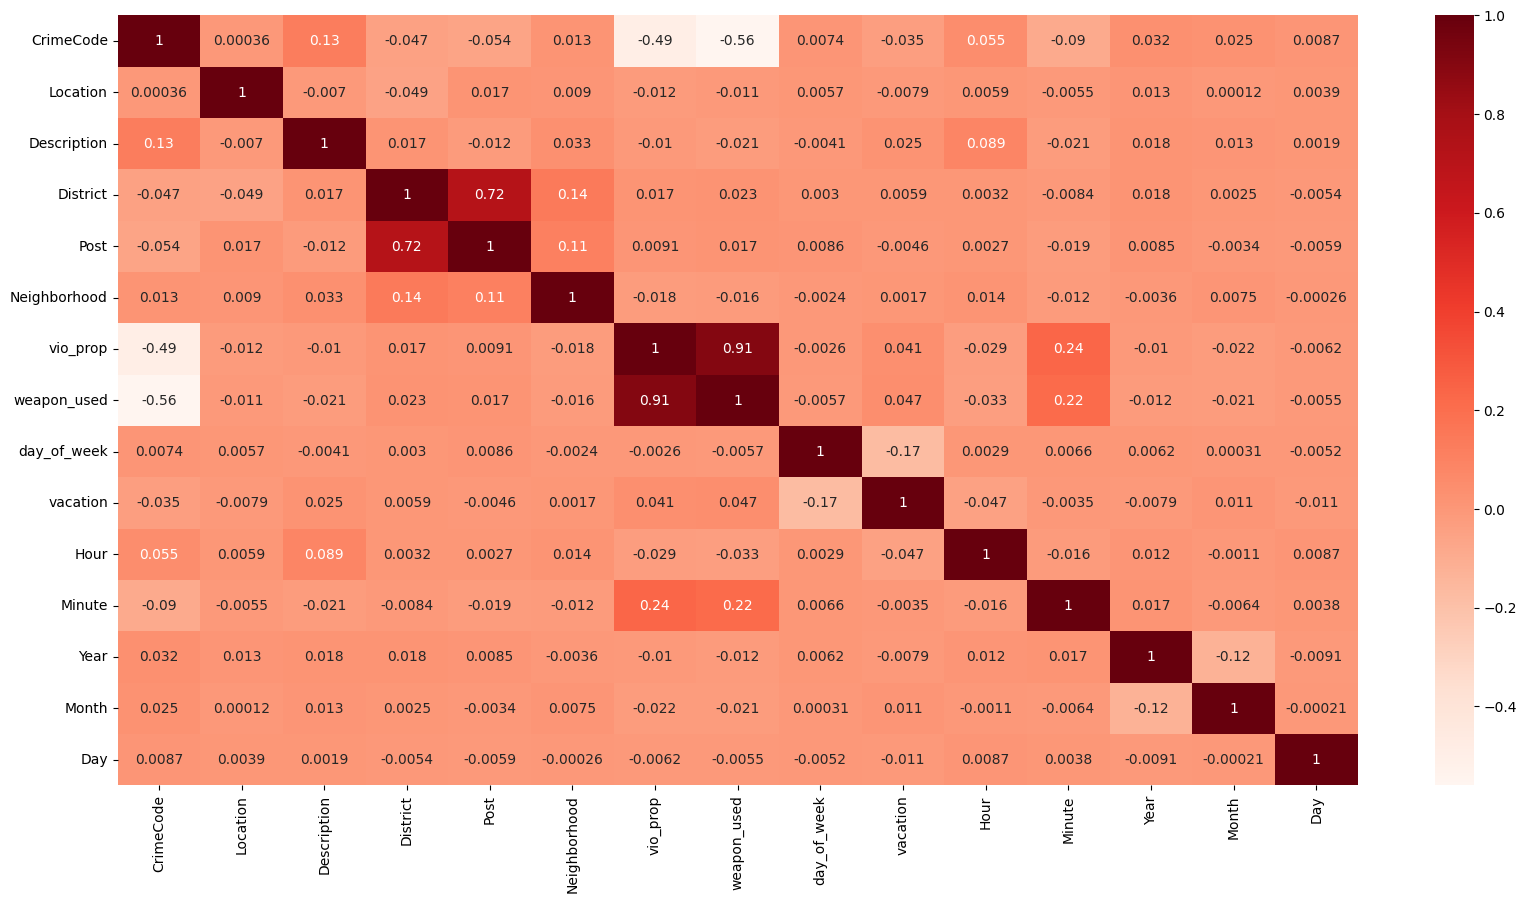

In [36]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = corr_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Not a lot of correlation here, however, the strong negative correlation between the new features 'weapon_used' and 'vio_prop' with the target feture 'CrimeCode' indicates that:

1) A strong negative correlation between 'Crime Name' and 'Weapon_Used' suggests that the likelihood or frequency of certain types of crimes decreases when a weapon is used. For instance, if 'Weapon_Used' is true (a weapon is used), certain crime types (as indicated by 'Crime Name') might be less frequent. This could imply that the presence of a weapon is less common in certain categories of crimes.

2) A strong negative correlation between 'vio_prop' and 'Crime Name' indicates that certain crime categories are less likely to be violent or, conversely, more likely to be property-related. For instance, if a particular 'Crime Name' correlates negatively with violent crimes in 'Vio_Prop', it might mean that this crime is more likely to be a property crime than a violent one.

choosing the most relevant features

In [38]:
#Correlation with output variable
cor_target = abs(cor['CrimeCode']).sort_values(ascending=False)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
irrelevant_features = cor_target[cor_target<=0.01]

In [39]:
relevant_features

CrimeCode       1.000000
weapon_used     0.559915
vio_prop        0.492884
Description     0.126087
Minute          0.089550
Hour            0.055193
Post            0.054186
District        0.047269
vacation        0.034742
Year            0.032012
Month           0.025454
Neighborhood    0.013378
Name: CrimeCode, dtype: float64

In [40]:
irrelevant_features

Day            0.008713
day_of_week    0.007434
Location       0.000360
Name: CrimeCode, dtype: float64

We will still have to use Day later for modeling

In [41]:
df = df.drop(['Location', 'day_of_week'], axis=1)

Now the data is ready for modeling

In [42]:
df.to_csv('Data/crime_cleaned_modeling.csv', index=False)